In [1]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns

In [2]:
# create Nitrogen oxides DataFrame

df_no2 = pd.read_csv('LaqnData_no2.csv')
print(df_no2.shape)
df_no2.head()

(29946, 6)


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO2,01/01/2006 00:00,37.4,ug m-3,R
1,CT3,NO2,02/01/2006 00:00,39.8,ug m-3,R
2,CT3,NO2,03/01/2006 00:00,57.5,ug m-3,R
3,CT3,NO2,04/01/2006 00:00,51.0,ug m-3,R
4,CT3,NO2,05/01/2006 00:00,50.7,ug m-3,R


In [3]:
# extra info about the DataFrame

df_no2.describe()

,Value
count,27790.000000
mean,42.419770
std,17.978645
min,3.500000
25%,29.100000
50%,40.600000
75%,53.400000
max,168.899990


In [4]:
# check number of sites (must be 6)

df_no2.Site.value_counts(dropna=False)

ZR2    4991
LH0    4991
BL0    4991
EN4    4991
CT3    4991
RI1    4991
Name: Site, dtype: int64

In [5]:
# create new column with site codes

df_no2.loc[df_no2.Site == 'CT3', 'Site_code'] = 1
df_no2.loc[df_no2.Site == 'LH0', 'Site_code'] = 2
df_no2.loc[df_no2.Site == 'BL0', 'Site_code'] = 3
df_no2.loc[df_no2.Site == 'RI1', 'Site_code'] = 4
df_no2.loc[df_no2.Site == 'EN4', 'Site_code'] = 5
df_no2.loc[df_no2.Site == 'ZR2', 'Site_code'] = 6

In [6]:
# check the new column

df_no2.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code
0,CT3,NO2,01/01/2006 00:00,37.4,ug m-3,R,1.0
1,CT3,NO2,02/01/2006 00:00,39.8,ug m-3,R,1.0
2,CT3,NO2,03/01/2006 00:00,57.5,ug m-3,R,1.0
3,CT3,NO2,04/01/2006 00:00,51.0,ug m-3,R,1.0
4,CT3,NO2,05/01/2006 00:00,50.7,ug m-3,R,1.0


In [7]:
# check tail of the DataFrame

df_no2.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code
29941,EN4,NO2,27/08/2019 00:00,45.3,ug m-3,P,5.0
29942,EN4,NO2,28/08/2019 00:00,19.6,ug m-3,P,5.0
29943,EN4,NO2,29/08/2019 00:00,21.9,ug m-3,P,5.0
29944,EN4,NO2,30/08/2019 00:00,29.8,ug m-3,P,5.0
29945,EN4,NO2,31/08/2019 00:00,29.8,ug m-3,P,5.0


In [8]:
# check minimum and maximum values

print(df_no2.min())
df_no2.max()

Site                                    BL0
Species                                 NO2
ReadingDateTime            01/01/2006 00:00
Value                                   3.5
Units                                ug m-3
Provisional or Ratified                   P
Site_code                                 1
dtype: object


Site                                    ZR2
Species                                 NO2
ReadingDateTime            31/12/2018 00:00
Value                                 168.9
Units                                ug m-3
Provisional or Ratified                   R
Site_code                                 6
dtype: object

In [60]:
# convert strings to datetime objects

df_no2.ReadingDateTime = pd.to_datetime(df_no2.ReadingDateTime)
df_no2.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code
0,CT3,NO2,2006-01-01,37.4,ug m-3,R,1.0
1,CT3,NO2,2006-02-01,39.8,ug m-3,R,1.0
2,CT3,NO2,2006-03-01,57.5,ug m-3,R,1.0
3,CT3,NO2,2006-04-01,51.0,ug m-3,R,1.0
4,CT3,NO2,2006-05-01,50.7,ug m-3,R,1.0


In [61]:
# check number of missing values

df_no2.isna().sum()

Site                       0
Species                    0
ReadingDateTime            0
Value                      0
Units                      0
Provisional or Ratified    0
Site_code                  0
dtype: int64

In [62]:
# check missing values

df_no2.loc[(df_no2).Value.isnull()].head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code


In [63]:
# delete the rows with Nan value for the df_no2 DataFrame

df_no2.dropna(inplace=True)
print(df_no2.shape)
df_no2.tail()

(27790, 7)


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code
29941,EN4,NO2,2019-08-27,45.3,ug m-3,P,5.0
29942,EN4,NO2,2019-08-28,19.6,ug m-3,P,5.0
29943,EN4,NO2,2019-08-29,21.9,ug m-3,P,5.0
29944,EN4,NO2,2019-08-30,29.8,ug m-3,P,5.0
29945,EN4,NO2,2019-08-31,29.8,ug m-3,P,5.0


In [64]:
# check minimum and maximum values

print(df_no2.min())
df_no2.max()

Site                                       BL0
Species                                    NO2
ReadingDateTime            2006-01-01 00:00:00
Value                                      3.5
Units                                   ug m-3
Provisional or Ratified                      P
Site_code                                    1
dtype: object


Site                                       ZR2
Species                                    NO2
ReadingDateTime            2019-12-08 00:00:00
Value                                    168.9
Units                                   ug m-3
Provisional or Ratified                      R
Site_code                                    6
dtype: object

In [65]:
# create year column

df_no2['Year'] = df_no2.ReadingDateTime.dt.year
df_no2.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code,Year
0,CT3,NO2,2006-01-01,37.4,ug m-3,R,1.0,2006
1,CT3,NO2,2006-02-01,39.8,ug m-3,R,1.0,2006
2,CT3,NO2,2006-03-01,57.5,ug m-3,R,1.0,2006
3,CT3,NO2,2006-04-01,51.0,ug m-3,R,1.0,2006
4,CT3,NO2,2006-05-01,50.7,ug m-3,R,1.0,2006


In [67]:
# create new dataframe with only the value and year columns

df_no2_new = df_no2.drop(['Site','Species','ReadingDateTime','Units','Provisional or Ratified','Site_code'],axis=1)
df_no2_new.head()

,Value,Year
0,37.4,2006
1,39.8,2006
2,57.5,2006
3,51.0,2006
4,50.7,2006


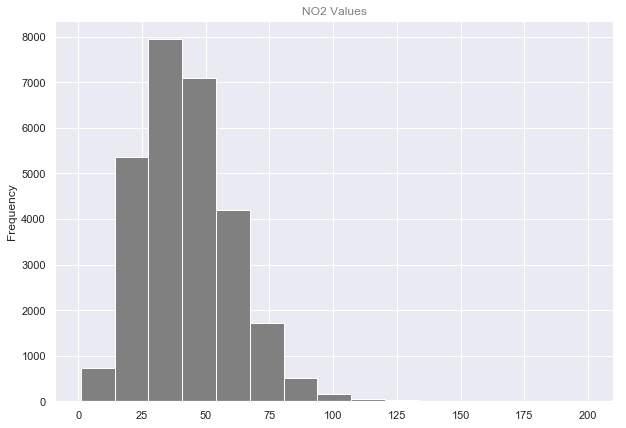

In [70]:
# make a frequency barplot

df_no2.Value.plot.hist(range=(1, 200), bins=15, color='grey')
plt.title('NO2 Values', color = 'grey')
plt.show()

In [14]:
# create PM10 particulates DataFrame

df_pm10 = pd.read_csv('LaqnData_pm10.csv')
print(df_pm10.shape)
df_pm10.head()

(29946, 6)


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,PM10,01/01/2006 00:00,7.0,ug/m3,R
1,CT3,PM10,02/01/2006 00:00,14.0,ug/m3,R
2,CT3,PM10,03/01/2006 00:00,19.0,ug/m3,R
3,CT3,PM10,04/01/2006 00:00,18.0,ug/m3,R
4,CT3,PM10,05/01/2006 00:00,20.0,ug/m3,R


In [15]:
# check number of sites 

df_pm10.Site.value_counts(dropna=False)

ZR2    4991
LH0    4991
BL0    4991
EN4    4991
CT3    4991
RI1    4991
Name: Site, dtype: int64

In [16]:
# create new column with site codes

df_pm10.loc[df_pm10.Site == 'CT3', 'Site_code2'] = 1
df_pm10.loc[df_pm10.Site == 'LH0', 'Site_code2'] = 2
df_pm10.loc[df_pm10.Site == 'BL0', 'Site_code2'] = 3
df_pm10.loc[df_pm10.Site == 'RI1', 'Site_code2'] = 4
df_pm10.loc[df_pm10.Site == 'EN4', 'Site_code2'] = 5
df_pm10.loc[df_pm10.Site == 'ZR2', 'Site_code2'] = 6

In [17]:
# check the new column

df_pm10.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code2
0,CT3,PM10,01/01/2006 00:00,7.0,ug/m3,R,1.0
1,CT3,PM10,02/01/2006 00:00,14.0,ug/m3,R,1.0
2,CT3,PM10,03/01/2006 00:00,19.0,ug/m3,R,1.0
3,CT3,PM10,04/01/2006 00:00,18.0,ug/m3,R,1.0
4,CT3,PM10,05/01/2006 00:00,20.0,ug/m3,R,1.0


In [18]:
# check minimum and maximum values

print(df_pm10.min())
df_pm10.max()

Site                                                 BL0
Species                                             PM10
ReadingDateTime                         01/01/2006 00:00
Value                                                 -1
Units                      ug m-3 reference equiv by VCM
Provisional or Ratified                                P
Site_code2                                             1
dtype: object


Site                                    ZR2
Species                                PM10
ReadingDateTime            31/12/2018 00:00
Value                                 138.9
Units                                 ug/m3
Provisional or Ratified                   R
Site_code2                                6
dtype: object

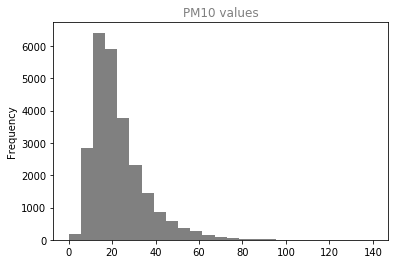

In [19]:
# create a frequency barplot

df_pm10.Value.plot.hist(range=(0, 140), bins=25, color='grey')
plt.title('PM10 values', color = 'grey')
plt.show()

In [20]:
# convert strings to datetime objects

df_pm10.ReadingDateTime = pd.to_datetime(df_pm10.ReadingDateTime)
df_pm10.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code2
0,CT3,PM10,2006-01-01,7.0,ug/m3,R,1.0
1,CT3,PM10,2006-02-01,14.0,ug/m3,R,1.0
2,CT3,PM10,2006-03-01,19.0,ug/m3,R,1.0
3,CT3,PM10,2006-04-01,18.0,ug/m3,R,1.0
4,CT3,PM10,2006-05-01,20.0,ug/m3,R,1.0


In [23]:
df_pm10.ReadingDateTime.head()

0   2006-01-01
1   2006-02-01
2   2006-03-01
3   2006-04-01
4   2006-05-01
Name: ReadingDateTime, dtype: datetime64[ns]

In [27]:
# create year column

df_pm10['Year'] = df_pm10.ReadingDateTime.dt.year
df_pm10.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code2,Year
0,CT3,PM10,2006-01-01,7.0,ug/m3,R,1.0,2006
1,CT3,PM10,2006-02-01,14.0,ug/m3,R,1.0,2006
2,CT3,PM10,2006-03-01,19.0,ug/m3,R,1.0,2006
3,CT3,PM10,2006-04-01,18.0,ug/m3,R,1.0,2006
4,CT3,PM10,2006-05-01,20.0,ug/m3,R,1.0,2006


In [28]:
# create new dataframe with only the value and year columns

df_pm10_new = df_pm10.drop(['Site','Species','ReadingDateTime','Units','Provisional or Ratified','Site_code2'],axis=1)
df_pm10_new.head()

,Value,Year
0,7.0,2006
1,14.0,2006
2,19.0,2006
3,18.0,2006
4,20.0,2006


In [29]:
# check number of missing values

df_pm10.isna().sum()

Site                          0
Species                       0
ReadingDateTime               0
Value                      4622
Units                         0
Provisional or Ratified       0
Site_code2                    0
Year                          0
dtype: int64

In [37]:
# check missing values

df_pm10.loc[(df_pm10).Value.isnull()]
print(df_pm10.shape)
df_pm10.head()

(29946, 8)


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code2,Year
0,CT3,PM10,2006-01-01,7.0,ug/m3,R,1.0,2006
1,CT3,PM10,2006-02-01,14.0,ug/m3,R,1.0,2006
2,CT3,PM10,2006-03-01,19.0,ug/m3,R,1.0,2006
3,CT3,PM10,2006-04-01,18.0,ug/m3,R,1.0,2006
4,CT3,PM10,2006-05-01,20.0,ug/m3,R,1.0,2006


In [38]:
# delete the rows with Nan value for the df_pm10 DataFrame

df_pm10.dropna(inplace=True)
print(df_pm10.shape)
df_pm10.tail()

(25324, 8)


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code2,Year
28671,EN4,PM10,2016-05-03,25.8,ug/m3,R,5.0,2016
28672,EN4,PM10,2016-06-03,26.4,ug/m3,R,5.0,2016
28673,EN4,PM10,2016-07-03,30.2,ug/m3,R,5.0,2016
28674,EN4,PM10,2016-08-03,34.9,ug/m3,R,5.0,2016
28675,EN4,PM10,2016-09-03,30.6,ug/m3,R,5.0,2016


In [35]:
# delete the rows with Nan value

df_pm10_new.dropna(inplace=True)
print(df_pm10_new.shape)
df_pm10_new.tail()

(25324, 2)


,Value,Year
28671,25.8,2016
28672,26.4,2016
28673,30.2,2016
28674,34.9,2016
28675,30.6,2016


In [ ]:
# plot

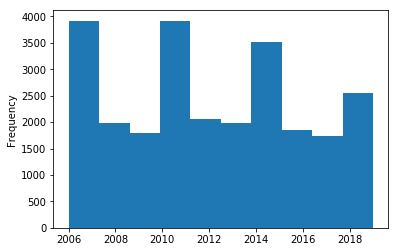

In [39]:
df_pm10_new['Year'].plot.hist()
# create a frequency barplot


In [40]:
year_2018=df_pm10_new.loc[df_pm10_new['Year']==2018]
year_2018.head()

,Value,Year
4383,16.0,2018
4384,17.0,2018
4385,27.0,2018
4386,15.0,2018
4387,15.0,2018


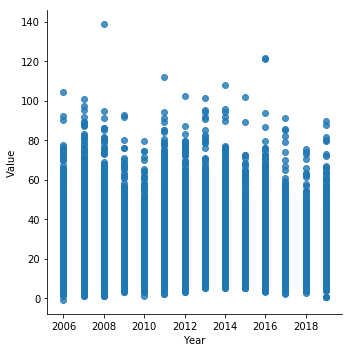

In [41]:
sns.lmplot( x="Year", y="Value", data=df_pm10_new, fit_reg=False)

In [42]:
# year_2018=df_pm10_new.loc[df_pm10_new['Year']==2018]
# year_2018.head()

year_2006=df_pm10_new.loc[df_pm10_new['Year']==2006]
year_2006.head()
air_18=year_2018['Value']
air_06=year_2006['Value']

In [47]:
year_2006=df_pm10_new.loc[df_pm10_new['Year']==2006]
air_06=year_2006['Value']

year_2007=df_pm10_new.loc[df_pm10_new['Year']==2007]
air_07=year_2007['Value']

year_2008=df_pm10_new.loc[df_pm10_new['Year']==2008]
air_08=year_2008['Value']

year_2009=df_pm10_new.loc[df_pm10_new['Year']==2009]
air_09=year_2009['Value']

year_2010=df_pm10_new.loc[df_pm10_new['Year']==2010]
air_10=year_2010['Value']

year_2011=df_pm10_new.loc[df_pm10_new['Year']==2011]
air_11=year_2011['Value']

year_2012=df_pm10_new.loc[df_pm10_new['Year']==2012]
air_12=year_2012['Value']

year_2013=df_pm10_new.loc[df_pm10_new['Year']==2013]
air_13=year_2013['Value']

year_2014=df_pm10_new.loc[df_pm10_new['Year']==2014]
air_14=year_2014['Value']

year_2015=df_pm10_new.loc[df_pm10_new['Year']==2015]
air_15=year_2015['Value']

year_2016=df_pm10_new.loc[df_pm10_new['Year']==2016]
air_16=year_2016['Value']

year_2017=df_pm10_new.loc[df_pm10_new['Year']==2017]
air_17=year_2017['Value']

year_2018=df_pm10_new.loc[df_pm10_new['Year']==2018]
air_18=year_2018['Value']

year_2019=df_pm10_new.loc[df_pm10_new['Year']==2019]
air_19=year_2019['Value']

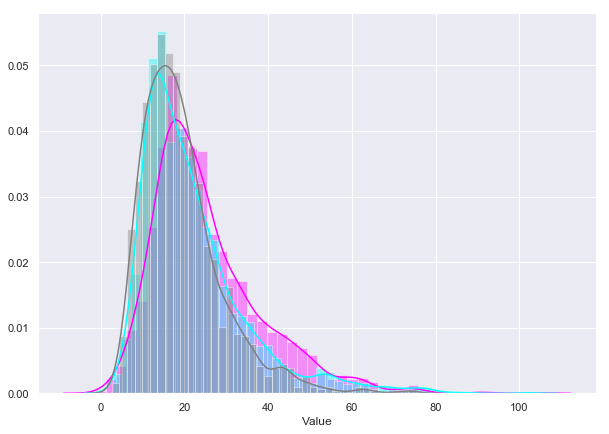

In [57]:
sns.set_color_codes('dark')
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(air_06, color='magenta')
sns.distplot(air_12, color='cyan')
sns.distplot(air_18, color='grey')
plt.legend(labels=['2006', '2012', '2018'])
